# Projeto de análise de dados referente a filmes


O projeto tem como objetivo apresentar as diversas relações que podemos encontrar no ramo de cinema

In [23]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Acessando os dados
df = pd.read_csv('movies.csv')

In [ ]:
#olhando um pouco do dado
df

In [ ]:
#procurando dados que podem estar faltando
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

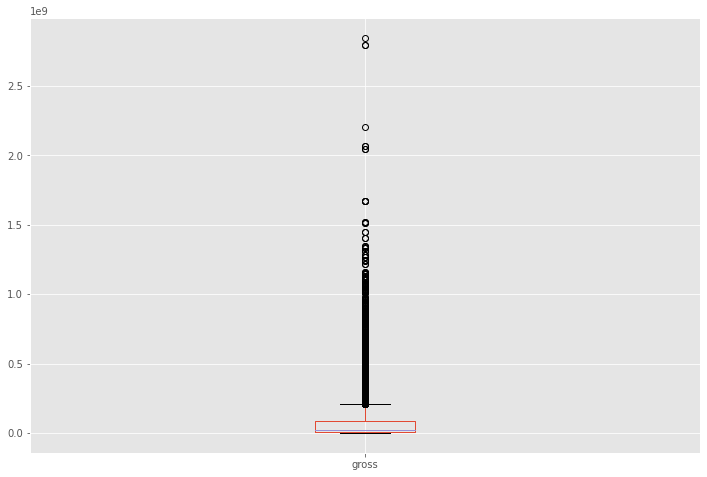

In [39]:
#checando se existem outliers no dado
df.boxplot(column=['gross'])

In [ ]:
#ordenando os dados
df.sort_values(by=['gross'], inplace=False, ascending=False)

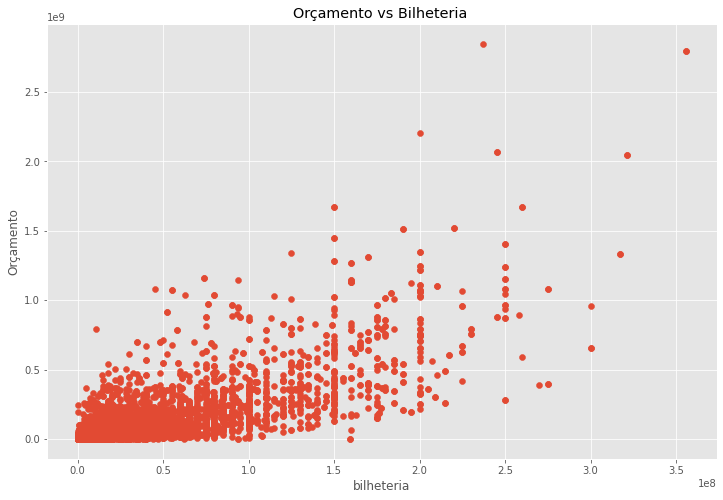

In [ ]:
#budget está diretamente relacionado com o faturamento dos filmes
#scatter plot com budget e gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title ('Orçamento vs Bilheteria ')
plt.xlabel('bilheteria')
plt.ylabel('Orçamento')
plt.show()

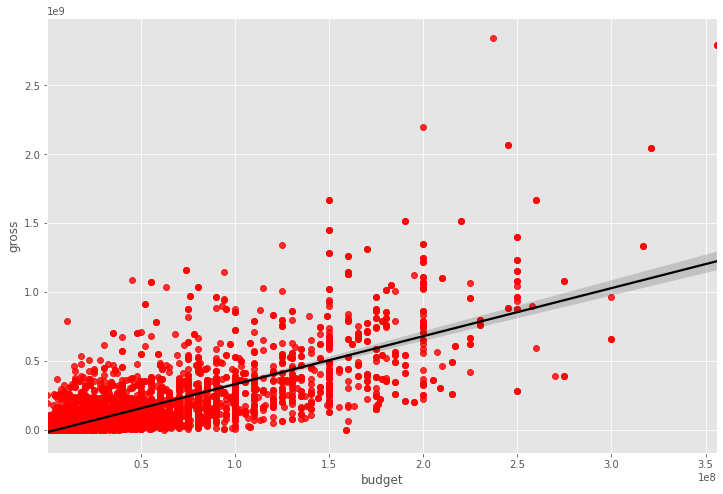

In [30]:
#plotando o orçamento com a bilheteria usando seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'black'})



In [32]:
#achando correlações 
df.corr(method='pearson')

,score,budget,gross,runtime
score,1.000000,0.095818,0.192390,0.400364
budget,0.095818,1.000000,0.757741,0.336783
gross,0.192390,0.757741,1.000000,0.253816
runtime,0.400364,0.336783,0.253816,1.000000


In [34]:
#existe uma grande relação entre o orçamento (budget) e a bilheteria(Gross)

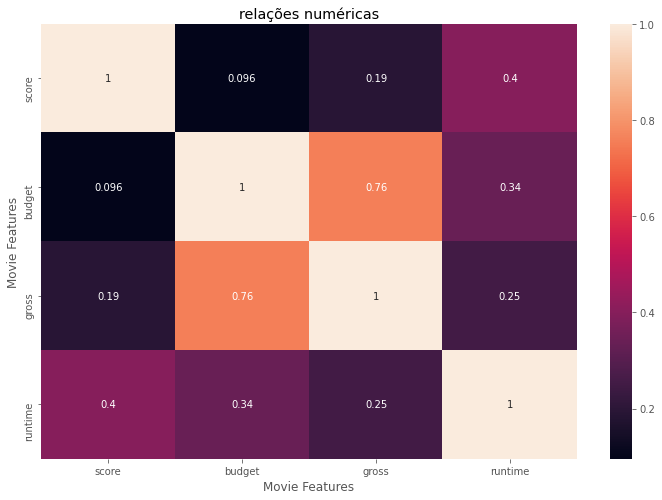

In [42]:
matrix_correlacional = df.corr(method='pearson')

sns.heatmap(matrix_correlacional, annot = True)
plt.scatter(x=df['budget'], y=df['gross'])
plt.title ('relações numéricas')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [45]:
#Olhando as companhias 
# Transformando os objetos em números
df_numerizado = df
for nome_col in df_numerizado.columns:
  if (df_numerizado[nome_col].dtype == 'object'):
    df_numerizado[nome_col] = df_numerizado[nome_col].astype('category')
    df_numerizado[nome_col] = df_numerizado[nome_col].cat.codes

 



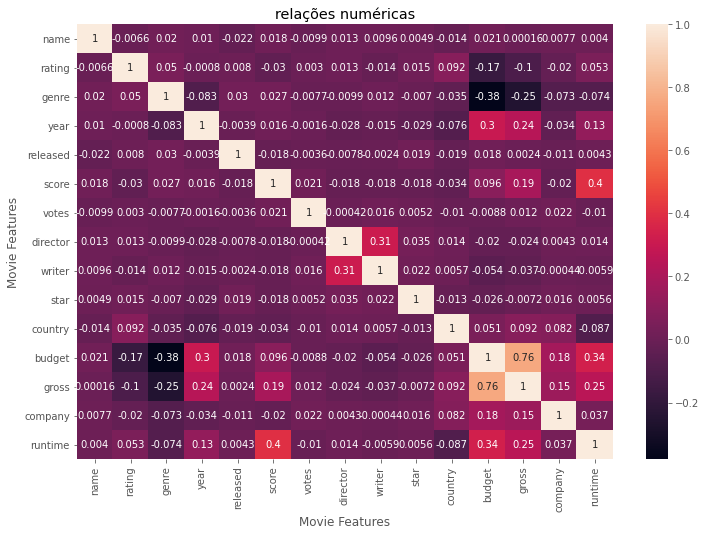

In [48]:
#checando as correlações novamente
matrix_correlacional = df_numerizado.corr(method='pearson')

sns.heatmap(matrix_correlacional, annot = True)
plt.scatter(x=df['budget'], y=df['gross'])
plt.title ('relações numéricas')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
mat_correlacional = df_numerizado.corr()
pares_correlacionais = mat_correlacional.unstack()
pares_correlacionais

In [52]:
pares_ordenados = pares_correlacionais.sort_values()
pares_ordenados

budget   genre     -0.379324
genre    budget    -0.379324
gross    genre     -0.250251
genre    gross     -0.250251
budget   rating    -0.172410
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [ ]:
grande_correlacao = pares_ordenados[(pares_ordenados)> 0.5] 
grande_correlacao